# Testis 3 Explore Clusters

In [26]:
import os
import sys
from pathlib import Path
from itertools import zip_longest

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory

# Setup notebook
nbconfig = Nb.setup_notebook('2018-03-27_testis3_explore_clusters', seurat_dir='../output/testis3_scRNAseq')

last updated: 2018-03-29 
Git hash: f801087de045aa9513181cc6ad771b9c12b12309


In [3]:
clusters = nbconfig.seurat.get_clusters()
tsne = nbconfig.seurat.get_tsne()
norm = nbconfig.seurat.get_normalized_read_counts()

In [4]:
_dat = clusters.join(tsne)

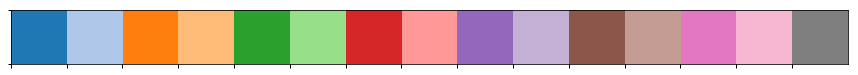

In [5]:
_colors = sns.color_palette('tab20', n_colors=15)
sns.palplot(_colors)

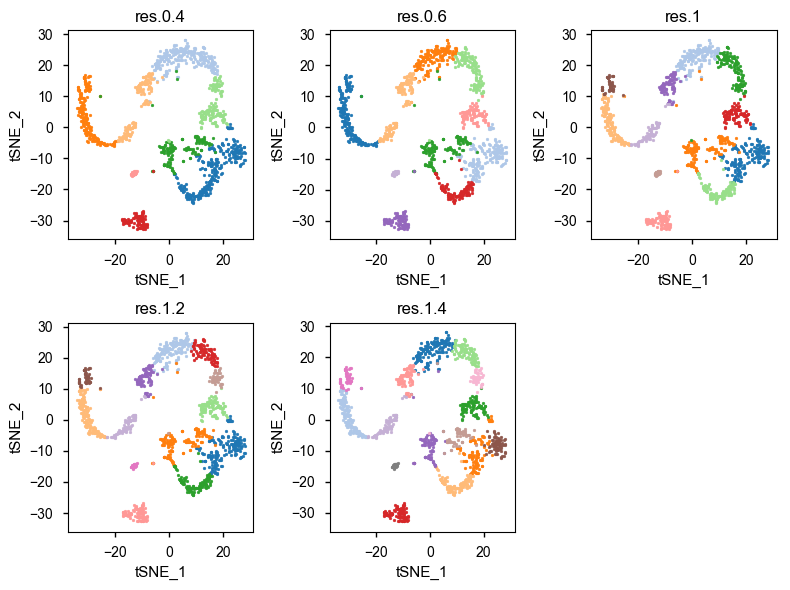

In [63]:
fig, axes = plt.subplots(2, 3)

for res, ax in zip_longest(clusters.columns, axes.flatten(), fillvalue=None):
    if res is None:
        ax.set_visible(False)
        continue
        
    TSNEPlot('tSNE_1', 'tSNE_2', _dat, 
             hue=res, palette=_colors,
             ax=ax, s=4
            )
    ax.legend_.remove()
    ax.set_title(res)
plt.tight_layout()

In [7]:
def _plot(gene, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    FBgn = nbconfig.symbol2fbgn[gene]
    TSNEPlot('tSNE_1', 'tSNE_2', tsne.join(norm.T[FBgn]), 
             hue=FBgn, cmap=sns.cubehelix_palette(rot=0, as_cmap=True), 
             vmin=0, vmax=2, ax=ax, **kwargs)
    ax.set_title(gene)

Text(0.5,1,'Testis 3')

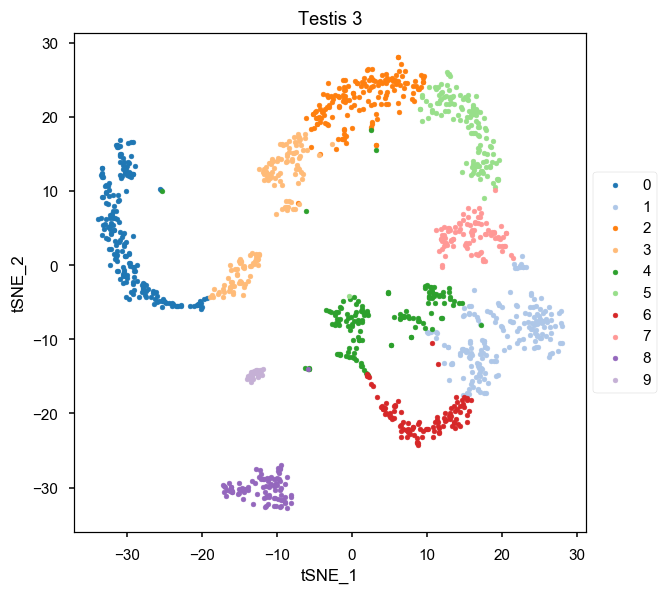

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=110)
TSNEPlot('tSNE_1', 'tSNE_2', _dat,  hue='res.0.6', palette=_colors, s=10, ax=ax)
ax.set_title('Testis 3')

In [27]:
biomarkers = pd.read_csv(Path(nbconfig.seurat_dir, 'biomarkers_0.6.tsv'), sep='\t', index_col=[0, 1, 'cluster'])

In [28]:
biomarkers = biomarkers.query('p_val_adj <= 0.0001')\
    .sort_values('avg_logFC')\
    .sort_index(level='cluster')\

In [47]:
soma = [
    'tj',
    'ImpL2',
    'fru',
    'foxo',
    'CadN',
    'crp',
    'Nrt',
    'bnb',
    'gbb',
    'Fas3',
    'tkv',
    'Egfr',
    'Lar',
    'Sox100B',
    'cora',
    'spict',
    'ems',
    'fax',
    'egr',
    'vkg',
    'spi',
    'oys',
    'dsx',
    'nord'
]

In [48]:
biomarkers.query(f'gene_symbol in {soma}')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,
FBgn0000964,tj,0,3.543590e-51,0.428310,0.343,0.035,4.791642e-47
FBgn0001090,bnb,0,1.615708e-62,1.258692,0.627,0.152,2.184760e-58
FBgn0001257,ImpL2,0,3.292848e-65,1.315726,0.682,0.187,4.452589e-61
FBgn0004108,Nrt,0,7.324667e-54,0.677068,0.532,0.119,9.904414e-50
FBgn0010434,cora,0,5.376550e-18,0.250679,0.303,0.093,7.270171e-14
FBgn0014163,fax,0,1.905450e-73,1.092228,1.000,0.629,2.576550e-69
FBgn0000464,Lar,2,2.895595e-21,0.360284,0.537,0.220,3.915423e-17
FBgn0001090,bnb,3,2.150521e-14,0.326566,0.463,0.195,2.907934e-10
FBgn0001994,crp,3,1.837876e-21,0.335408,0.671,0.295,2.485175e-17


In [56]:
early_germ = [
    'Phf7',
    'vas',
    'bam',
    'bgcn',
    'tut',
    'tej',
    'Rbp9',
    'hts',
    'mle',
    'Marf'
]

In [57]:
biomarkers.query(f'gene_symbol in {early_germ}')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,
FBgn0031091,Phf7,2,4.266110e-14,0.302277,0.710,0.426,5.768634e-10
FBgn0283442,vas,2,3.343910e-41,0.539617,0.741,0.272,4.521635e-37
FBgn0000158,bam,3,2.137413e-48,0.488951,0.611,0.151,2.890210e-44
FBgn0010263,Rbp9,3,1.945746e-22,0.328917,0.537,0.219,2.631038e-18
FBgn0031091,Phf7,3,2.948818e-24,0.526236,0.785,0.420,3.987392e-20
FBgn0033921,tej,3,3.064552e-15,0.267123,0.389,0.154,4.143887e-11
FBgn0263391,hts,3,7.744277e-11,0.271981,0.691,0.520,1.047181e-06
FBgn0283442,vas,3,1.783037e-53,0.704160,0.805,0.268,2.411022e-49
FBgn0002774,mle,5,1.366873e-20,0.307879,0.654,0.284,1.848286e-16


In [58]:
late_germ = [
    'aly',
    'mia',
    'CG3927',
    'sunz',
    'sowi',
    'soti',
    'c-cup',
    'd-cup',
    'wa-cup',
    'p-cup',
    'r-cup',
    'fzo',
]

In [59]:
biomarkers.query(f'gene_symbol in {late_germ}')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,
FBgn0011596,fzo,1,4.331292e-37,0.661795,0.699,0.339,5.856774e-33
FBgn0031367,c-cup,1,3.846717e-29,0.536770,0.813,0.498,5.201531e-25
FBgn0034739,CG3927,1,9.963202e-40,0.734146,0.917,0.614,1.347224e-35
FBgn0037460,sowi,1,2.388927e-32,0.615888,0.891,0.614,3.230308e-28
FBgn0037462,sunz,1,4.826880e-17,0.417336,0.653,0.391,6.526907e-13
FBgn0037502,wa-cup,1,7.673034e-18,0.449732,0.596,0.346,1.037548e-13
FBgn0038089,d-cup,1,2.608669e-27,0.488724,0.653,0.316,3.527442e-23
FBgn0038225,soti,1,1.067929e-52,0.844127,1.000,0.778,1.444054e-48
FBgn0011596,fzo,4,4.303964e-30,0.260105,0.888,0.331,5.819820e-26


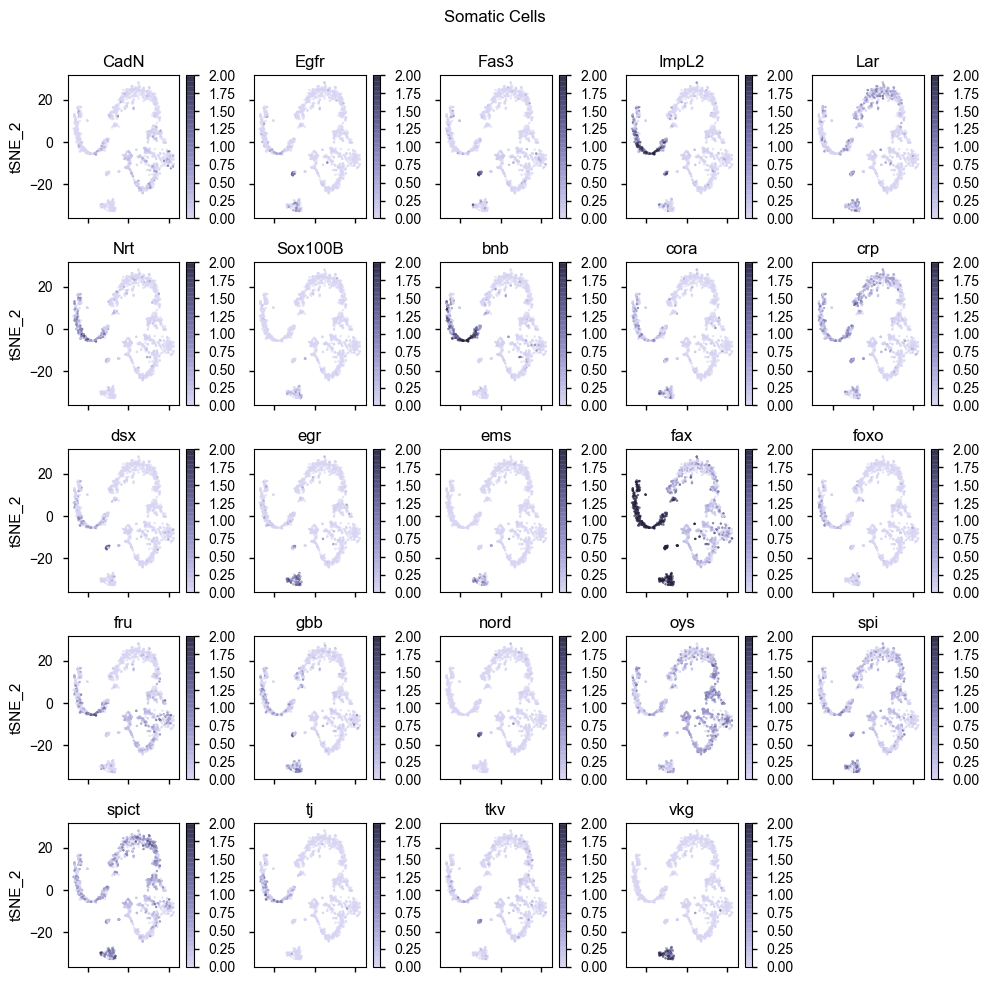

In [60]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(10, 10))

for gene, ax in zip_longest(sorted(soma), axes.flatten(), fillvalue=None):
    if gene is None:
        ax.set_visible(False)
        continue
    _plot(gene, ax, s=2, alpha=.6)
    
plt.suptitle('Somatic Cells')
plt.tight_layout(rect=[0, 0, 1, .95])

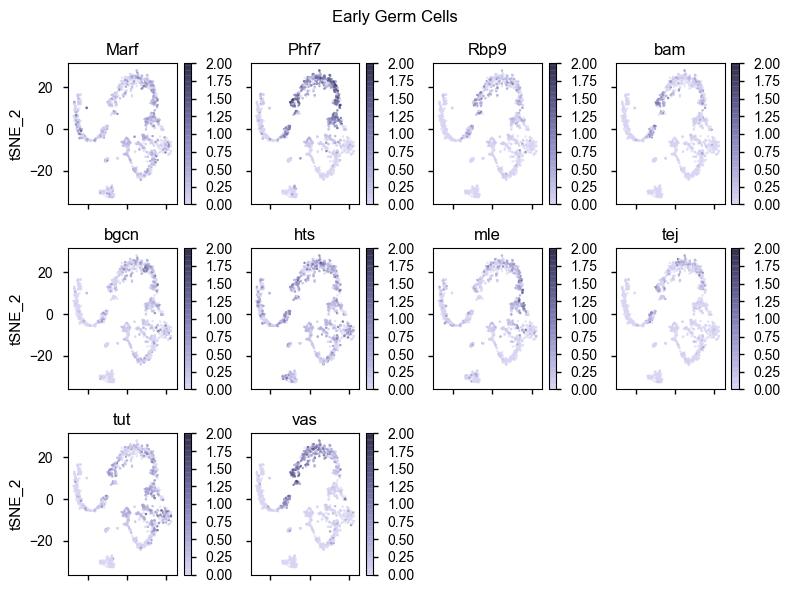

In [61]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True)

for gene, ax in zip_longest(sorted(early_germ), axes.flatten(), fillvalue=None):
    if gene is None:
        ax.set_visible(False)
        continue
    _plot(gene, ax, s=2, alpha=.6)
    
plt.suptitle('Early Germ Cells')
plt.tight_layout(rect=[0, 0, 1, .95])

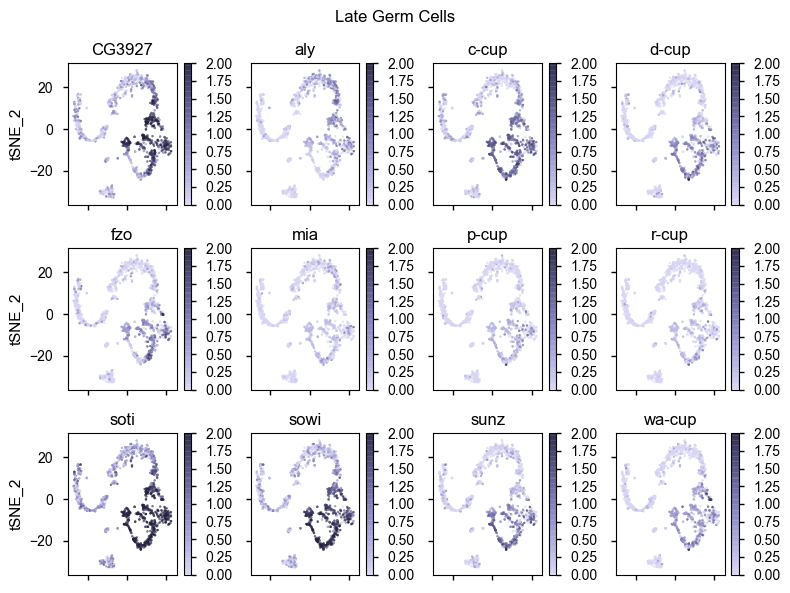

In [62]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True)

for gene, ax in zip_longest(sorted(late_germ), axes.flatten(), fillvalue=None):
    if gene is None:
        ax.set_visible(False)
        continue
    _plot(gene, ax, s=2, alpha=.6)
    
plt.suptitle('Late Germ Cells')
plt.tight_layout(rect=[0, 0, 1, .95])